# Линейная регрессия

## Лабораторная работа №2


---

**Впишите в эту ячейку ваши ФИО, группу и вариант**.

ФИО: Сильченко Алексей Евгеньевич

Группа: 201-361

Вариант: 1

---

Далее по ходу ноутбука вам встрется ячейки с кодом, в которых будут комментарии с заданиями, и текстовые ячейки как эта с вопросами, на которые вам необходимо письменно в ноутбуке ответить.

Все ячейки необходимо запускать.

Данные для вариантов лежат по ссылкам:

1. http://labcolor.space/linreg-1.csv
1. http://labcolor.space/linreg-2.csv

Скопируйте ссылку для своего варианта.

### Импортирование модулей для выполнения работы

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 12, 5

In [2]:
# Из соответствующего модуля библиотеки sklearn импортируйте класс нужной модели

# Этот класс предоставляет функциональность для обучения и использования модели линейной регрессии.
from sklearn.linear_model import LinearRegression #

## Чтение данных и краткий анализ

In [3]:
# Используя метод read_csv() из Pandas считайте данные для вашего варианта.

# URL файла данных
file_url = 'http://labcolor.space/linreg-1.csv'

# Чтение данных из файла
df = pd.read_csv(file_url)

# Вывод первых нескольких строк данных для проверки
print(df.head())

           X          y
0  15.374756  24.394275
1   0.780478   3.333808
2  20.828226  35.224102
3  22.883040  37.235602
4  32.212915  50.746781


In [4]:
# Используя методы describe(), head() просмотрите ваши данные.

# Вывод первых строк данных
print(df.head())

# Вывод описательной статистики
print(df.describe())

num_objects = df.shape[0]

           X          y
0  15.374756  24.394275
1   0.780478   3.333808
2  20.828226  35.224102
3  22.883040  37.235602
4  32.212915  50.746781
               X           y
count  50.000000   50.000000
mean   15.970735   30.363804
std     8.403019   23.541054
min     0.362969    2.698014
25%    10.251188   18.915306
50%    15.892694   25.987420
75%    21.026480   35.029801
max    34.670504  113.693596


**Сколько объектов есть в вашем наборе данных?**

Ответ: 50

**Сколько и каких признаков у ваших объектов?**

Ответ: 2 x и y

## Проверка на отсутствующие значения

Используя метод isnull() датафрейма (df) проверьте есть ли отсутствующие значения в ваших данных.

In [5]:
# ваш код
# Проверка на наличие отсутствующих значений в каждом столбце
missing_values = df.isnull().any()

print(missing_values)

X    False
y    False
dtype: bool


Если в вашем наборе данных есть пропуски, то удалите эти образцы используя метод dropna().

In [6]:
# ваш код
# Удаление строк с пропущенными значениями
df_cleaned = df.dropna()

# Проверка размера нового DataFrame после удаления пропусков
print(df_cleaned.shape)

(50, 2)


**Сколько объектов было удалено?**

Ответ: 0, т.к. пропуски отсутствовали

Используя метод pop() разделите ваши зависимые и независимые переменные - X, y

In [7]:
# Извлечение зависимой переменной y
y = df.pop('y')

# Оставшийся DataFrame теперь содержит только независимую переменную X
X = df

Далее используя метод train_test_split() разделите данные на обучающую и проверочную части. В тестовую часть выделите 20% ваши данных и укажите random_state для воспроизводимости вашего результата.

In [8]:
# ваш код
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Вывод размеров полученных выборок для проверки
print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

Размер обучающей выборки: (40, 1)
Размер тестовой выборки: (10, 1)


## Обучение без обработки

In [9]:
# Создайте объект модели линейной регрессии

regr =  LinearRegression()

# Обучите модель с использованием обучающего набора

regr.fit(X_train, y_train)  # ваш код

# Сделайте прогноз используя полученную модель

y_pred = regr.predict(X_test)  # ваш код

**Сколько параметров в вашей модели линейной регрессии?**

Ваш ответ: два параметра: один для веса независимой переменной и один для свободного члена

Сравните спрогнозированные значения с тестовыми с помощью средней квадратичной ошибки и коэффициент детерминации.

In [10]:
# В функции требуется передать нужные данные

# Расчет средней квадратичной ошибки
mse = mean_squared_error(y_test, y_pred)

# Расчет коэффициента детерминации
r2 = r2_score(y_test, y_pred)

print(f"Средняя квадратичная ошибка: {mse:.2f}")
print(f"Коэффициент детерминации: {r2:.2f}")

Средняя квадратичная ошибка: 27.36
Коэффициент детерминации: 0.57


Визуализация результатов.

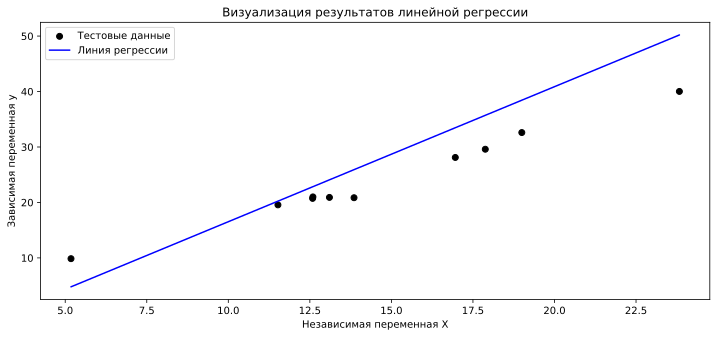

In [11]:
# plt.scatter(X_test, y_test, color="black")
# plt.plot(X_test, y_pred, color="blue")

# Визуализация тестовых данных
plt.scatter(X_test, y_test, color="black", label="Тестовые данные")

# Визуализация предсказанных данных
plt.plot(X_test, y_pred, color="blue", label="Линия регрессии")

# Добавление заголовка и меток осей
plt.title("Визуализация результатов линейной регрессии")
plt.xlabel("Независимая переменная X")
plt.ylabel("Зависимая переменная y")

# Добавление легенды
plt.legend()

# Показать график
plt.show()

## Удаление выбросов

Для удаления выбросов воспользуемся z-оценкой.

$z_i = \frac{x_i - \mu}{\sigma}$, где

$\mu$ - cреднее значение, $\sigma$ - стандартное отклонение.

In [12]:
# Используя метод read_csv() из Pandas повторно считайте данные для вашего варианта.

df = pd.read_csv(file_url)


С помощью np.mean() и np.std() рассчитайте $\mu$ - cреднее значение, $\sigma$ - стандартное отклонение.

In [13]:
# Расчет среднего значения (mean) для каждого столбца
mean = np.mean(df, axis=0)

# Расчет стандартного отклонения (std) для каждого столбца
std = np.std(df, axis=0)

print("Среднее значение (mean):", mean)
print("Стандартное отклонение (std):", std)

Среднее значение (mean): X    15.970735
y    30.363804
dtype: float64
Стандартное отклонение (std): X     8.318564
y    23.304455
dtype: float64


Добавляем к нашим данным новую колонку z-score.

In [14]:
# Расчет z-score для столбца 'X'
df["z-score"] = df.apply(lambda x: (x['X'] - mean['X']) / std['X'], axis=1)
print("Z-Score столбца 'X':")
print(df["z-score"])

Z-Score столбца 'X':
0    -0.071644
1    -1.826067
2     0.583934
3     0.830949
4     1.952522
5     0.505727
6     1.074245
7    -1.355695
8     0.456932
9    -0.364405
10    1.387663
11   -1.001336
12   -0.263988
13   -0.407053
14   -0.000327
15    1.133870
16   -1.284052
17   -0.405897
18   -0.009390
19   -0.345033
20   -1.876257
21   -0.257436
22    1.891737
23   -0.900412
24   -0.009373
25    0.363953
26    0.118822
27    1.829655
28   -1.076908
29   -0.738463
30    0.229341
31    0.781348
32   -0.534868
33    0.317004
34    0.650418
35    0.429350
36   -1.663520
37   -0.851856
38    0.469917
39    0.944690
40    0.094354
41   -1.193044
42   -0.259937
43    1.042904
44    0.615711
45   -0.254429
46    2.247956
47   -1.622275
48   -1.297516
49   -0.081825
Name: z-score, dtype: float64


**Опишите что такое lambda в python**

Ваш ответ: В Python, lambda является ключевым словом, которое используется для создания анонимных (или неименованных) функций. Эти функции называются "анонимными", потому что они не объявляются стандартным способом с использованием ключевого слова def. Lambda-функции могут принимать любое количество аргументов, но могут иметь только одно выражение, результат которого автоматически возвращается. Они часто используются в ситуациях, где необходима простая функция для кратковременного использования.

Если z-оценка больше +3 или меньше -3, то данное значение считаем выбросом и удаляем его из наших данных.

In [15]:
original_count = len(df)
df = df.loc[(df['z-score'] <= 3) & (df['z-score'] >= -3)]
filtered_count = len(df)
removed_values = original_count - filtered_count
print("Количество удаленных значений как выбросы:", removed_values)

Количество удаленных значений как выбросы: 0


**В чем заключается идея z-оценки и что подразумевает диапазон от -3 до 3?**

Ваш ответ: Z-оценка является статистической мерой, которая описывает положение отдельного значения в рамках распределения. Она измеряет, сколько стандартных отклонений значение находится от среднего значения набора данных. Z-оценка

**Сколько значений было удалено как выбросы?**

Ваш ответ: 0

## Обучение после обработки

In [16]:
# Создайте объект модели линейной регрессии

regr =  LinearRegression()

# Обучите модель с использованием обучающего набора

regr.fit(X_train, y_train)  # ваш код

# Сделайте прогноз используя полученную модель

y_pred = regr.predict(X_test)  # ваш код

Как и в разделе обучение без обработки оцените модель регрессии по средней квадратичной ошибке и коэффициенту детерминации.

In [17]:
#
# Ваш код

# Расчет средней квадратичной ошибки
mse = mean_squared_error(y_test, y_pred)

# Расчет коэффициента детерминации
r2 = r2_score(y_test, y_pred)

print(f"Средняя квадратичная ошибка: {mse:.2f}")
print(f"Коэффициент детерминации: {r2:.2f}")

Средняя квадратичная ошибка: 27.36
Коэффициент детерминации: 0.57


Визуализируйте результат.

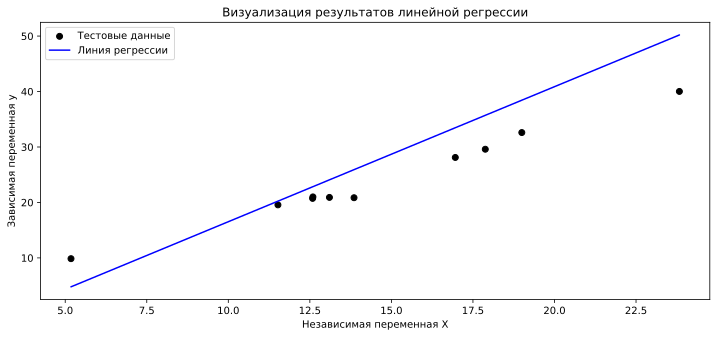

In [18]:
#
# Ваш код

# Визуализация тестовых данных
plt.scatter(X_test, y_test, color="black", label="Тестовые данные")

# Визуализация предсказанных данных
plt.plot(X_test, y_pred, color="blue", label="Линия регрессии")

# Добавление заголовка и меток осей
plt.title("Визуализация результатов линейной регрессии")
plt.xlabel("Независимая переменная X")
plt.ylabel("Зависимая переменная y")

# Добавление легенды
plt.legend()

# Показать график
plt.show()

Сравните результаты до работы с выбросами и после.

**Как изменились результаты работы модели после удаления выбросов?**

Ваш ответ: никак, т.к. выбрасов не было. Но в теории результаты должны были стать лучше.

**Опишите идею метода наименьших квадратов.**

Ваш ответ: заключается в минимизации суммы квадратов разностей между наблюдаемыми значениями зависимой переменной и значениями, предсказанными моделью. Этот метод позволяет найти наилучшую линию (или гиперплоскость в случае множественной регрессии), которая описывает зависимость между независимыми и зависимыми переменными.